# **CIFAR-10 Image Classification using Convolutional Neural Networks**

**Problem Statement:**

The goal of this project is to build a Convolutional Neural Network (CNN) model to classify color images from the CIFAR-10 dataset into ten different object categories. The model learns visual features from images and predicts the correct class for unseen data.

In [48]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
# Load CIFAR-10 dataset from TensorFlow
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

**Observation:**

CIFAR-10 contains 60,000 color images belonging to 10 different object categories.

In [50]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

**Observation:**

Each image has shape 32×32×3, confirming RGB color channels.

In [51]:
# Class labels for visualization
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

/tmp/ipython-input-219394790.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(train_labels[i])])


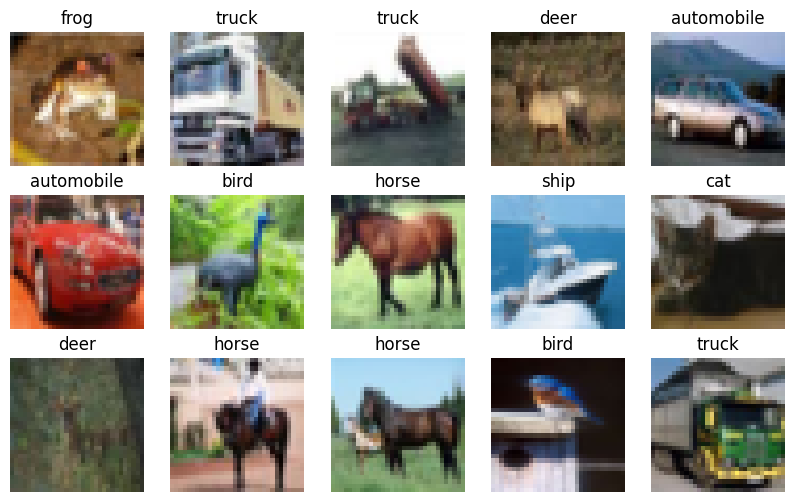

In [52]:
# Visualize Sample Images
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[int(train_labels[i])])
    plt.axis('off')
plt.show()

**Observation:**

Images are real-world colored objects, making CNN necessary instead of ANN.

In [53]:
# Normalize pixel values to range 0–1
train_images = train_images / 255.0
test_images = test_images / 255.0

**Observation:**

Normalization improves training speed and model stability.

## **CNN Model Architecture:**

In [54]:
model = models.Sequential()

# Convolution Layer 1
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

# Convolution Layer 2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Convolution Layer 3
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Flatten layer
model.add(layers.Flatten())

# Dense hidden layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

The model summary shows how convolution layers gradually reduce spatial dimensions
while increasing depth, allowing the network to learn hierarchical image features.


In [56]:
# Compile Model
model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

## **Train Model:**

In [57]:
# Training the CNN model using the CIFAR-10 dataset.
history = model.fit(train_images, train_labels,
                    epochs=10, validation_data= (test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3460 - loss: 1.7581 - val_accuracy: 0.5399 - val_loss: 1.2813
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5651 - loss: 1.2172 - val_accuracy: 0.6108 - val_loss: 1.0925
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6326 - loss: 1.0392 - val_accuracy: 0.6422 - val_loss: 1.0113
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6747 - loss: 0.9267 - val_accuracy: 0.6466 - val_loss: 1.0209
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7011 - loss: 0.8500 - val_accuracy: 0.6850 - val_loss: 0.9166
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7268 - loss: 0.7896 - val_accuracy: 0.6935 - val_loss: 0.8874
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7469 - loss: 0.7293 - val_accuracy: 0.6995 - val_loss: 0.8648
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7583 - loss: 0.6828 

## **Evaluate Model:**

In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7148 - loss: 0.8574
Test Accuracy: 0.7148000001907349


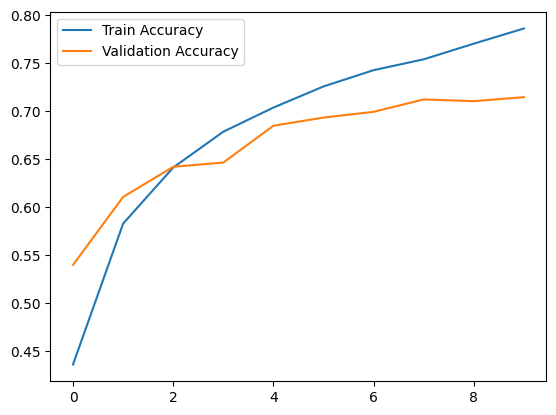

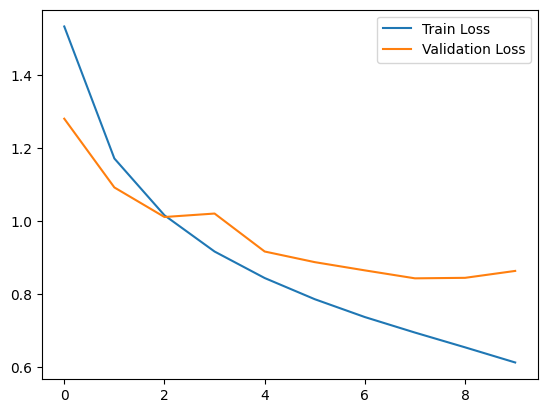

In [59]:
# Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [60]:
# Classification Report
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(test_labels.flatten(), y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1000
           1       0.83      0.83      0.83      1000
           2       0.58      0.64      0.61      1000
           3       0.49      0.61      0.54      1000
           4       0.69      0.66      0.68      1000
           5       0.74      0.51      0.60      1000
           6       0.76      0.80      0.78      1000
           7       0.76      0.77      0.77      1000
           8       0.80      0.84      0.82      1000
           9       0.78      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.72     10000
weighted avg       0.72      0.71      0.72     10000



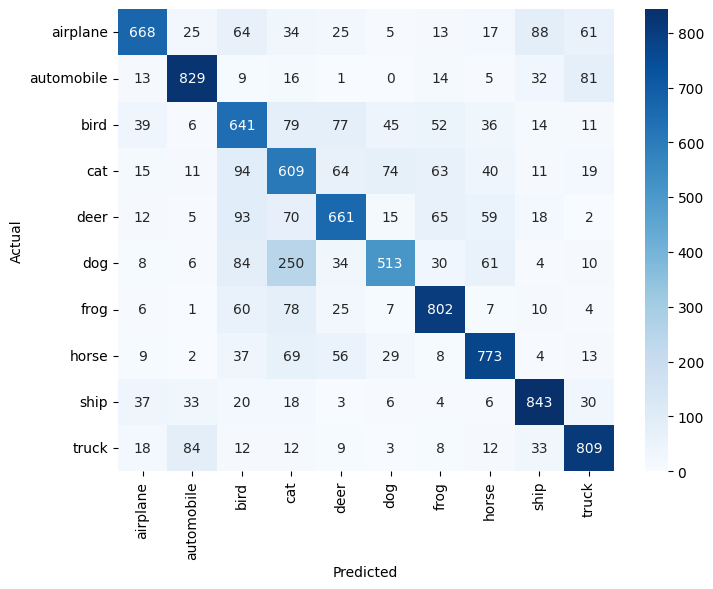

In [61]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


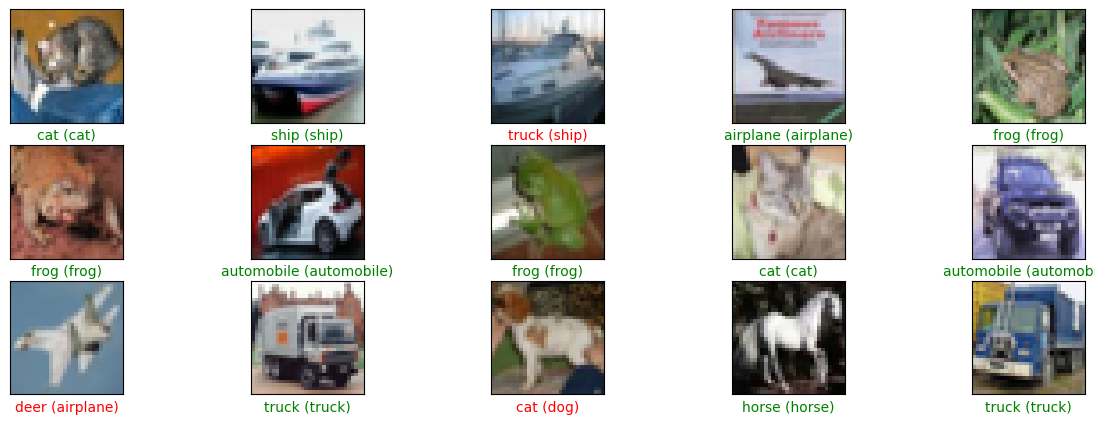

In [62]:
# Visual comparison of predicted vs actual labels
predictions = model.predict(test_images)

# Show first 15 test images, their predicted and true labels
plt.figure(figsize=(15,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    color = 'green' if pred_label == true_label else 'red'
    plt.xlabel(f"{class_names[pred_label]} ({class_names[true_label]})", color=color)
plt.show()

##**Conclusion:**

This project demonstrates how Convolutional Neural Networks can effectively classify
real-world RGB images from the CIFAR-10 dataset. The trained model learns hierarchical
features such as edges, textures, and object shapes, proving CNN’s strength in image
recognition tasks.
